In [2]:
import numpy as np, pandas as pd
import networkx as nx
from dowhy import gcm

import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)

In [3]:
#Treat dataset

#Import data 
# data = pd.read_csv('../datasets/consolidated.csv',header=0, index_col=0)
data = pd.read_csv('../Datasets/Networkwise/consolidated_5s.csv',header=0, index_col=0)
consolidated = pd.DataFrame(data)


consolidated = consolidated.drop(columns=['experiment', 'topology'])#, 'messageBandwidth'])#, 'gossipBandwidth'])#, 'messageDuplicated'])#, 'n_nodes', 'consensus', 'messageDuplicated'])
# consolidated = consolidated.loc[consolidated['totalBandwidth'] > 0]
# consolidated.head(100)

consolidateddiff = consolidated.dropna().dropna()

X = consolidateddiff[['d', 'messageReceived', 'graft', 'prune', 'dlo', 'dhi', 'dout', 'messageOverhead', 'topics', 'topicSize']].to_numpy()
training_data = consolidateddiff[['d', 'messageReceived', 'graft', 'prune', 'dlo', 'dhi', 'dout', 'messageOverhead', 'topics', 'topicSize']]


training_data.head(500)

,d,messageReceived,graft,prune,dlo,dhi,dout,messageOverhead,topics,topicSize
0,8,43.0,0.0,0.0,6,12,2,321.0,1,16
1,8,54.0,0.0,0.0,6,12,2,389.0,1,16
2,8,96.0,0.0,0.0,6,12,2,702.0,1,16
3,8,88.0,0.0,0.0,6,12,2,629.0,1,16
4,8,61.0,0.0,0.0,6,12,2,454.0,1,16
5,8,96.0,0.0,0.0,6,12,2,686.0,1,16
6,8,85.0,0.0,0.0,6,12,2,615.0,1,16
7,8,85.0,0.0,0.0,6,12,2,649.0,1,16
8,8,98.0,0.0,0.0,6,12,2,724.0,1,16
9,8,74.0,0.0,0.0,6,12,2,559.0,1,16


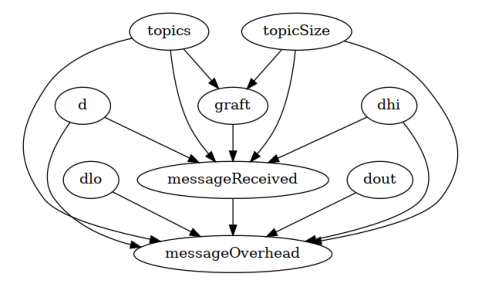

In [4]:
causal_graph = nx.read_adjlist("../1_Discovery/MessageOverhead/AdjLists/pcStable5s.adjlist", create_using=nx.DiGraph)
causal_graph.remove_node('prune')

G=gcm.util.plot(causal_graph, figure_size=[6, 8])

In [5]:
causal_model = gcm.StructuralCausalModel(causal_graph)
gcm.auto.assign_causal_mechanisms(causal_model, training_data)
gcm.fit(causal_model, training_data)

Fitting causal mechanism of node topicSize: 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]      


In [123]:
topicSizeIntervention = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18.19,20,21,22,23]
topicsIntervention = [2,8,16,24]

simulatedTopics = pd.DataFrame()
simulated = pd.DataFrame()

for i in topicSizeIntervention:
    samples = gcm.interventional_samples(causal_model,
                                     {'topicSize': lambda x: i},
                                     num_samples_to_draw=1000)
    for j in topicsIntervention:
        causal_model2 = gcm.StructuralCausalModel(causal_graph)
        gcm.auto.assign_causal_mechanisms(causal_model2, samples)
        gcm.fit(causal_model2, samples)
                    
        samplesTopics = gcm.interventional_samples(causal_model2,
                                     {'topics': lambda x: j},
                                     num_samples_to_draw=1000)
        simulatedTopics = pd.concat([simulatedTopics, samplesTopics])
    
    simulated =  pd.concat([simulated, simulatedTopics])

simulated = simulated.reset_index()

interventions = simulated.loc[(simulated['messageOverhead'] > 0)]# &  (simulated['messageReceived'] > 0) & (simulated['graft'] > 0) ]
interventions = interventions.loc[(interventions['d'] == 8) & (interventions['dlo'] == 6) & (interventions['dhi'] == 12) & (interventions['dout'] == 2)]
intervention = interventions.groupby(['d', 'dlo','dhi','dout','topics', 'topicSize']).mean()

intervention = intervention.reset_index()

intervention.head(500)

Fitting causal mechanism of node topicSize: 100%|██████████| 9/9 [00:00<00:00, 22.95it/s]      


,d,dlo,dhi,dout,topics,topicSize,index,graft,messageReceived,messageOverhead
0,8,6,12,2,2,2.00,326.666667,0.333333,30.000000,263.333333
1,8,6,12,2,2,3.00,516.000000,-2.400000,29.600000,234.600000
2,8,6,12,2,2,4.00,17.000000,1.000000,43.000000,279.000000
3,8,6,12,2,2,5.00,637.800000,-0.800000,26.600000,184.800000
4,8,6,12,2,2,6.00,391.250000,-0.750000,25.000000,194.250000
5,8,6,12,2,2,7.00,557.500000,-1.500000,16.000000,103.000000
6,8,6,12,2,2,8.00,811.000000,2.000000,12.000000,28.000000
7,8,6,12,2,2,10.00,248.400000,0.200000,25.200000,184.000000
8,8,6,12,2,2,11.00,517.333333,0.666667,21.333333,167.000000
9,8,6,12,2,2,12.00,438.000000,1.500000,28.000000,210.500000


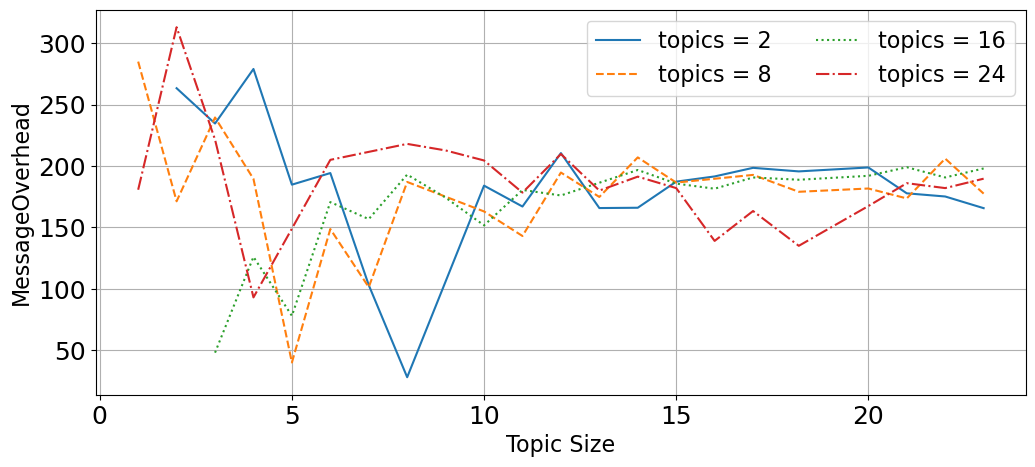

In [134]:
fig, ax = plt.subplots(figsize=(12, 5))

plt.style.use('default')

linetypes = ['solid', 'dashed', 'dotted', 'dashdot', '-.']

line = 0
for x in topicsIntervention:
    plotter = intervention.loc[intervention['topics'] == x]
    ax.plot(plotter['topicSize'], plotter['messageOverhead'], label="topics = "+str(x),  linestyle=linetypes[line])
    line += 1
    
# ax2.bar(simulated['topicSize'], simulated['topics'], color ='pink', width = 0.4, alpha=0.5)
ax.set(xlabel='Topic Size', ylabel='MessageOverhead')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rcParams.update({'font.size': 16})

# ax.set_ylim(0, 25)
ax.legend(loc='upper right', ncols=2)
ax.grid()

fig.savefig("topicSizeIntervention.png")
fig.savefig('topicSizeIntervention.pdf', format='pdf', facecolor='white', edgecolor='none', bbox_inches='tight', dpi=600)
plt.show()



In [ ]:
# Selected topics = 8 topicSize = 16

In [6]:
values = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# dout = [2,8,16,24]

simulated = pd.DataFrame()

samples = gcm.interventional_samples(causal_model,
                                     {'topicSize': lambda x: 16},
                                     num_samples_to_draw=1000)
causal_model2 = gcm.StructuralCausalModel(causal_graph)
gcm.auto.assign_causal_mechanisms(causal_model2, samples)
gcm.fit(causal_model2, samples)
                    
samples2 = gcm.interventional_samples(causal_model2,
                                     {'topics': lambda x: 8},
                                     num_samples_to_draw=1000)
causal_model3 = gcm.StructuralCausalModel(causal_graph)
gcm.auto.assign_causal_mechanisms(causal_model3, samples2)
gcm.fit(causal_model3, samples2)

for d in values:
    samples3 = gcm.interventional_samples(causal_model3,
                                     {'d': lambda x: d},
                                     num_samples_to_draw=1000)
    simulated =  pd.concat([simulated, samples3])

simulated = simulated.reset_index()

interventions2 = simulated.loc[(simulated['messageOverhead'] > 0)]# &  (simulated['messageReceived'] > 0) & (simulated['graft'] > 0) ]
# interventions2 = interventions2.loc[(interventions2['dlo'] == (interventions2['d']-4)) & (interventions2['dhi'] == (interventions2['d']+4)) & (interventions2['dout'] == 2)]
intervention2 = interventions2.drop(columns=['dhi', 'dlo', 'dout']).groupby(['d','topics', 'topicSize']).mean()


intervention2 = intervention2.reset_index()

intervention2.head(500)

Fitting causal mechanism of node topicSize: 100%|██████████| 9/9 [00:00<00:00, 33.75it/s]      


,d,topics,topicSize,index,graft,messageReceived,messageOverhead
0,2,8,16,499.265121,0.026210,78.070565,284.161290
1,3,8,16,498.587286,0.150353,76.028254,278.378406
2,4,8,16,498.172727,0.356566,88.091919,352.450505
3,5,8,16,500.872362,-0.153769,87.530653,461.754774
4,6,8,16,498.346774,0.239919,72.088710,389.396169
5,7,8,16,500.542886,0.045409,71.851665,400.677094
6,8,8,16,499.691843,0.015106,69.778449,500.032226
7,9,8,16,500.006054,-0.349142,69.502523,486.703330
8,10,8,16,501.469806,-0.071648,62.384852,445.665302
9,11,8,16,500.820619,-0.157732,62.223711,449.818557


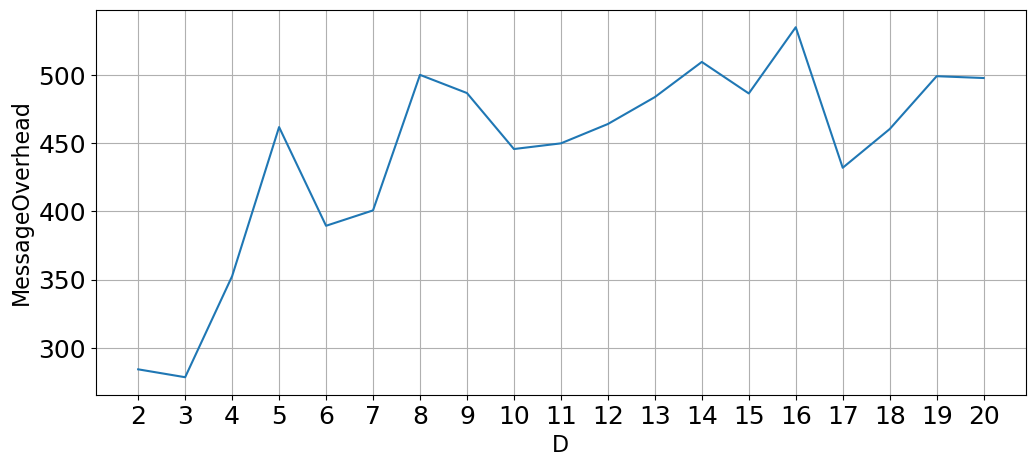

In [9]:
fig, ax = plt.subplots(figsize=(12, 5))

# for x in topicsIntervention:
#     plotter = intervention.loc[intervention['topics'] == x]
ax.plot(intervention2['d'], intervention2['messageOverhead'])

# ax2.bar(simulated['topicSize'], simulated['topics'], color ='pink', width = 0.4, alpha=0.5)
ax.set(xlabel='D', ylabel='MessageOverhead')


plt.xticks(ticks=values, labels=values,fontsize=18)
# plt.xticks(x, labels, rotation ='vertical') 

plt.yticks(fontsize=18)
plt.rcParams.update({'font.size': 16})

# ax.set_ylim(0, 25)
# ax.legend(loc='upper right', ncols=2)
ax.grid()

fig.savefig("dIntervention.png")
fig.savefig('dIntervention.pdf', format='pdf', facecolor='white', edgecolor='none', bbox_inches='tight', dpi=600)
plt.show()

